# Simulacije FBM

Koristi se Wood--Chan metoda u radu [Ševčenka](https://arxiv.org/abs/1406.1956). Također:
- [Simulation and identification of the fractional Brownian motion: a bibliographical and comparative study](https://www.jstatsoft.org/article/view/v005i07)
- [Simulation of Stationary Gaussian Processes in $[0,1]^d$ (Wood--Chan)](https://www.jstor.org/stable/1390903?seq=23)
- [Simulation of fractional Brownian motion (thesis, Twente)](https://www.columbia.edu/~ad3217/fbm/thesisold.pdf)

In [1]:
import numpy as np
from numpy.fft import fft, ifft

import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/lsimek/matplotlibrc/main/navy.mplstyle')
plt.rcParams.update({
    'text.usetex': False,
    'font.serif': 'DejaVu Serif'
})
import seaborn as sns

import scipy.stats as stats
import scipy.linalg as linalg

import os
import sys

In [7]:
def get_simuls(H, n=10**4, q=10, T=1):
    N = 2**q+1
    M = 2**(q+1)
    
    temp = np.arange(N-1+1)
    rho_H = 1/2 * ( (temp+1)**(2*H) + np.abs((temp-1))**(2*H) - 2*temp**(2*H) )

    c = np.hstack((rho_H, rho_H[1:-1][::-1]))

    # naci lambde preko FFT
    root_lambda = np.real(fft(c))**0.5

    # standardni normalni vektor, jedna realizacija = jedan stupac, n ponavljanja u n stupaca
    zeta = np.random.normal(size=(M,n))

    # do xi
    xi = np.real(ifft(zeta, axis=0))
    xi = xi * root_lambda.reshape(-1,1)
    xi = np.real(fft(xi, axis=0))
    xi = xi[:N, :]
    xi = xi.cumsum(axis=0)
    xi *= (T/N) ** H  # gledamo FBM na segmentu [0,1], skalirati prije 

    return xi

## Izgled trajektorija

/tmp/ipykernel_52375/2125780109.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scaled_labels)


Text(0.5, 1.0, 'Trajectories of FBM')

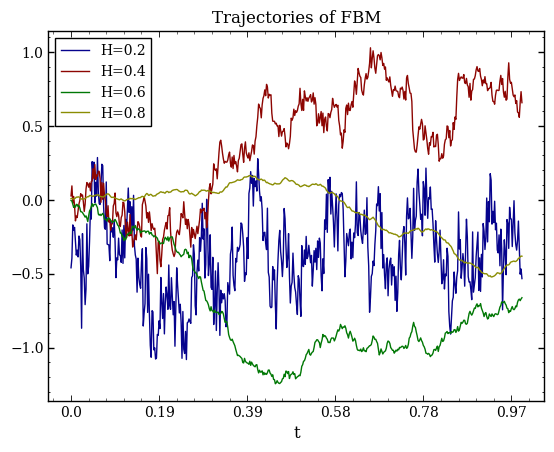

In [12]:
Hs = [0.2, 0.4, 0.6, 0.8]
# fig, ax = plt.subplots(2,2,figsize=(20,20))
fig, ax = plt.subplots()
q=9
for H in Hs:
    simul = get_simuls(H, n=1, q=q).flatten()
    sns.lineplot(simul, label=f'{H=}', ax=ax)

float_labels = [float(label.get_text().replace('−', '-')) for label in ax.get_xticklabels()]
scaled_labels = [round(label / (2**q+1), 2) for label in float_labels]
ax.set_xticklabels(scaled_labels)
ax.set_xlabel('t')
ax.set_title('Trajectories of FBM')

## Raspon